# Boilerplate

In [1]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2

In [2]:
import plotnine
from plotnine import *

# kmodes library

In [3]:
from kmodes.kprototypes import KPrototypes

In [4]:
data = pd.read_csv('data/sales.csv')

In [5]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [6]:
data.select_dtypes(include = 'object').nunique()

Region               7
Country            185
Item Type           12
Sales Channel        2
Order Priority       4
Order Date        2691
Ship Date         2719
dtype: int64

# Dataprep

In [7]:
df = data
df.shape

(10000, 14)

In [8]:
df = data.drop('Order ID', axis = 1)

df = df.drop(['Order Date','Ship Date'], axis = 1)

df = df.drop('Country', axis = 1)

In [9]:
df.shape

(10000, 10)

# Model

## Save position of categorical data

In [10]:
cols = df.select_dtypes('object').columns
catColumnPos = [df.columns.get_loc(col) for col in list(cols)]

print(f'Categorical columns:{cols.values} \nand their positions: {catColumnPos}')

Categorical columns:['Region' 'Item Type' 'Sales Channel' 'Order Priority'] 
and their positions: [0, 1, 2, 3]


## Save data to matrix

In [11]:
dfMatrix = df.to_numpy()
dfMatrix

array([['Sub-Saharan Africa', 'Office Supplies', 'Online', ...,
        2920025.64, 2353920.64, 566105.0],
       ['Europe', 'Beverages', 'Online', ..., 51008.75, 34174.25,
        16834.5],
       ['Middle East and North Africa', 'Vegetables', 'Offline', ...,
        1003700.9, 592408.95, 411291.95],
       ...,
       ['Sub-Saharan Africa', 'Vegetables', 'Offline', ..., 388847.44,
        229507.32, 159340.12],
       ['Sub-Saharan Africa', 'Meat', 'Online', ..., 3672974.34,
        3174991.14, 497983.2],
       ['Asia', 'Snacks', 'Offline', ..., 55081.38, 35175.84, 19905.54]],
      dtype=object)

## Elbow Method

In [12]:
cost = []
for cluster in range(1,5):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, 
                                 init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnPos)
        cost.append(kprototype.cost_)
        print(f'Cluster initiaion:{cluster}')
    except Exception as e:
        print(f'exception <<{e}>> raised')
        break

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

Cluster initiaion:1


array([1, 0, 0, ..., 0, 1, 0], dtype=uint16)

Cluster initiaion:2


array([2, 1, 1, ..., 1, 0, 1], dtype=uint16)

Cluster initiaion:3


array([1, 3, 3, ..., 3, 1, 3], dtype=uint16)

Cluster initiaion:4


In [13]:
df_cost = pd.DataFrame({'Cluster':range(1,5), 'Cost':cost})

In [16]:
plt.style.use('seaborn-white')

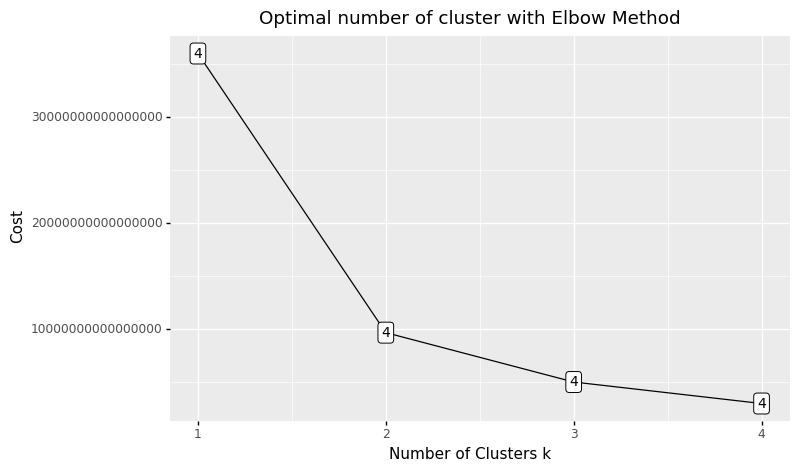

<ggplot: (8771785289921)>

In [18]:
plotnine.options.figure_size = (8,5);
(
    ggplot(data = df_cost) + 
    geom_line(aes(x = 'Cluster', y = 'Cost')) + 
    geom_point(aes(x = 'Cluster', y = 'Cost')) + 
    geom_label(aes(x = 'Cluster', y = 'Cost'
                   ,label = 'cluster'),
              size = 10, nudge_y = 1000) + 
    labs(title = 'Optimal number of cluster with Elbow Method') + 
    xlab('Number of Clusters k') + 
    ylab('Cost')
)

# Fit 

In [20]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnPos)

array([2, 1, 1, ..., 1, 0, 1], dtype=uint16)

# Results

In [21]:
# Cluster centorid
kprototype.cluster_centroids_
# Check the iteration of the clusters created
kprototype.n_iter_
# Check the cost of the clusters created
kprototype.cost_

array([['7904.365546218487', '593.5265126050487', '457.7854957983237',
        '4622760.54755461', '3559121.123487404', '1063639.4240672272',
        'Europe', 'Household', 'Offline', 'L'],
       ['4046.6694875411376', '163.25910672308268', '105.79686882933876',
        '467709.4517003616', '281142.9546497418', '186566.49705061852',
        'Sub-Saharan Africa', 'Personal Care', 'Online', 'C'],
       ['6093.2754219843555', '384.2645039110733', '275.09750102922703',
        '1995888.1232729503', '1380539.5273034165', '615348.5959695351',
        'Europe', 'Cosmetics', 'Online', 'H']], dtype='<U32')

7

4960713581025175.0

In [22]:
# Add the cluster to the dataframe
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third'])

In [24]:
df

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total,Segment
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.21,524.96,2920025.64,2353920.64,566105.00,2,Third
1,Europe,Beverages,Online,C,1075,47.45,31.79,51008.75,34174.25,16834.50,1,Second
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.06,90.93,1003700.90,592408.95,411291.95,1,Second
3,Sub-Saharan Africa,Household,Online,C,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,0,First
4,Europe,Beverages,Online,C,3491,47.45,31.79,165647.95,110978.89,54669.06,1,Second
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Beverages,Online,H,8597,47.45,31.79,407927.65,273298.63,134629.02,1,Second
9996,Europe,Cosmetics,Online,C,562,437.20,263.33,245706.40,147991.46,97714.94,1,Second
9997,Sub-Saharan Africa,Vegetables,Offline,M,2524,154.06,90.93,388847.44,229507.32,159340.12,1,Second
9998,Sub-Saharan Africa,Meat,Online,L,8706,421.89,364.69,3672974.34,3174991.14,497983.20,0,First


<AxesSubplot:xlabel='Total Profit', ylabel='Total Cost'>

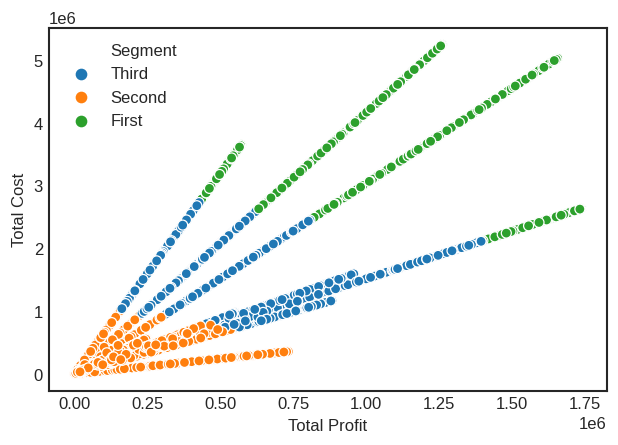

In [25]:
sns.scatterplot(data = df, x = 'Total Profit', y = 'Total Cost', hue = 'Segment')

<AxesSubplot:xlabel='Total Revenue', ylabel='Total Cost'>

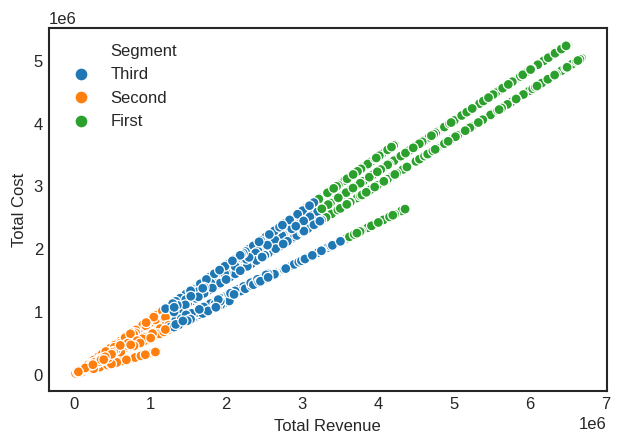

In [26]:
sns.scatterplot(data = df, x = 'Total Revenue', y = 'Total Cost', hue = 'Segment')

<AxesSubplot:xlabel='Units Sold', ylabel='Unit Price'>

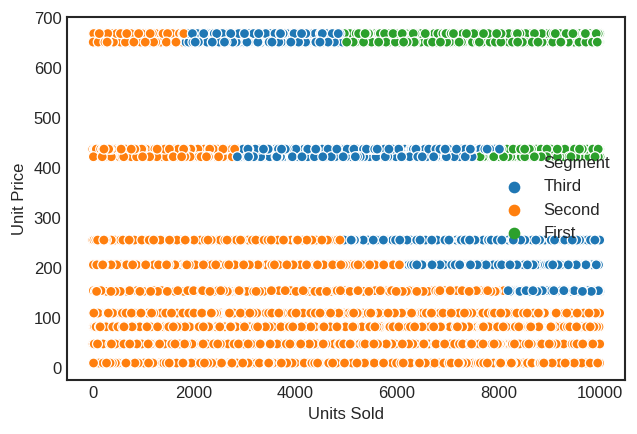

In [27]:
sns.scatterplot(data = df, x = 'Units Sold', y = 'Unit Price', hue = 'Segment')

In [41]:
df

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total,Segment
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.21,524.96,2920025.64,2353920.64,566105.00,2,Third
1,Europe,Beverages,Online,C,1075,47.45,31.79,51008.75,34174.25,16834.50,1,Second
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.06,90.93,1003700.90,592408.95,411291.95,1,Second
3,Sub-Saharan Africa,Household,Online,C,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,0,First
4,Europe,Beverages,Online,C,3491,47.45,31.79,165647.95,110978.89,54669.06,1,Second
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Beverages,Online,H,8597,47.45,31.79,407927.65,273298.63,134629.02,1,Second
9996,Europe,Cosmetics,Online,C,562,437.20,263.33,245706.40,147991.46,97714.94,1,Second
9997,Sub-Saharan Africa,Vegetables,Offline,M,2524,154.06,90.93,388847.44,229507.32,159340.12,1,Second
9998,Sub-Saharan Africa,Meat,Online,L,8706,421.89,364.69,3672974.34,3174991.14,497983.20,0,First


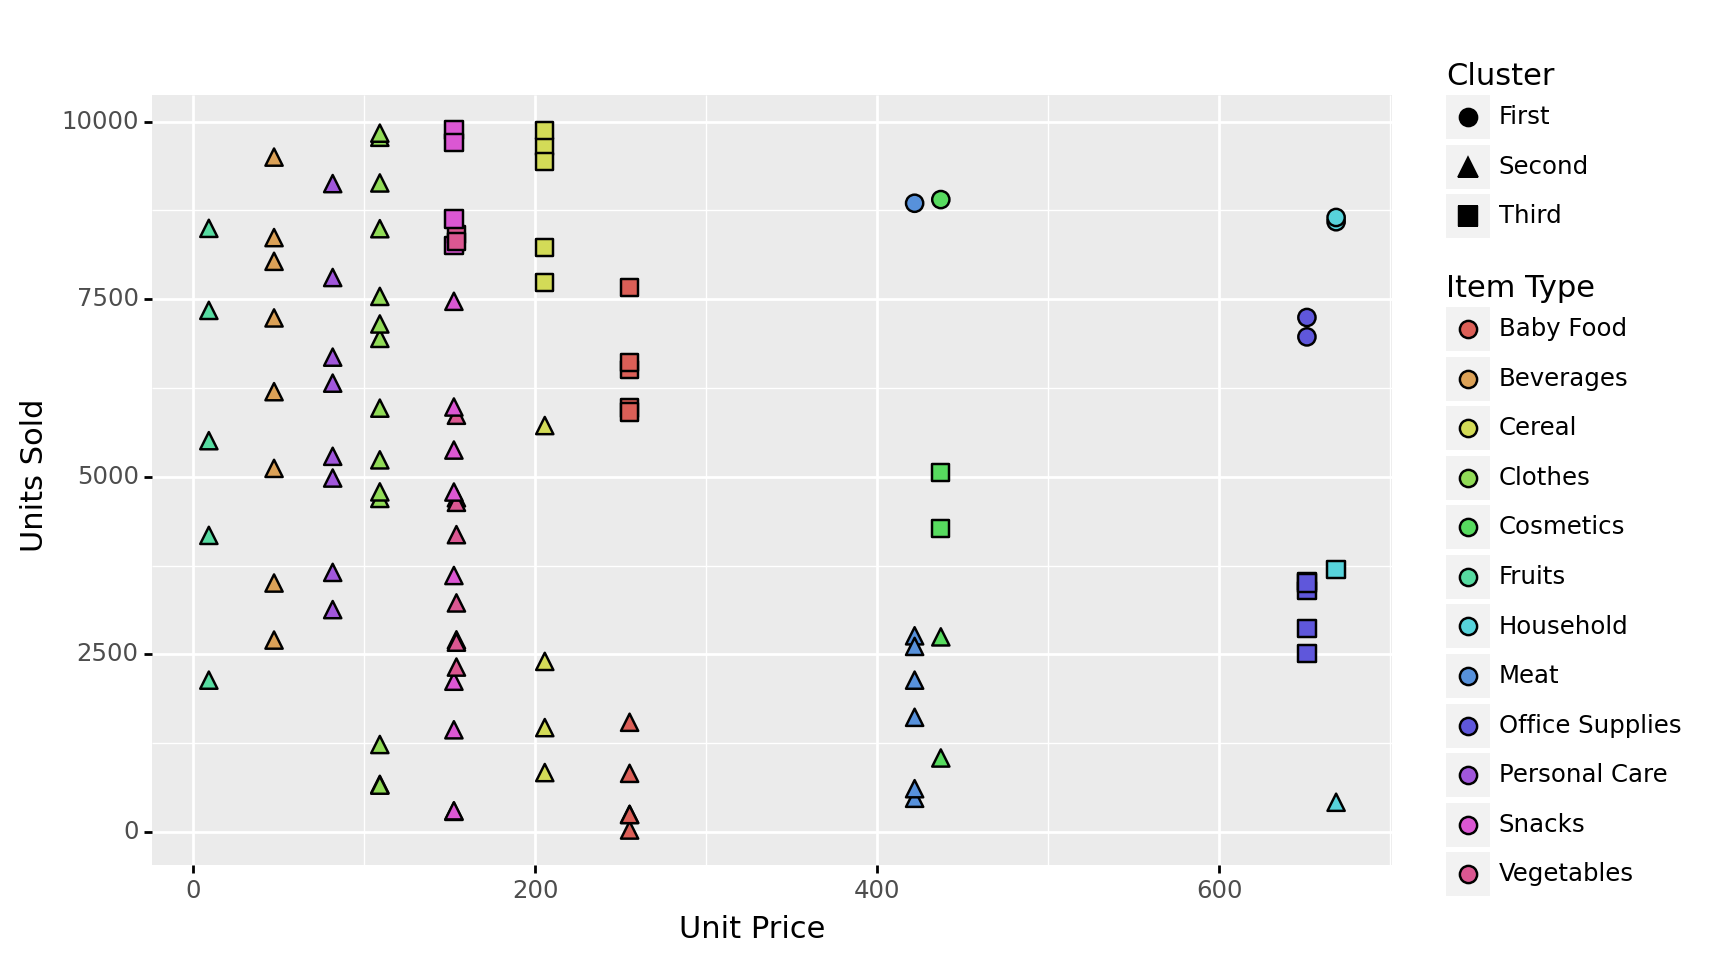

<ggplot: (8771784833761)>

In [43]:
plotnine.options.figure_size = (8,5);
plotnine.options.dpi = 200
_x = 'Unit Price'
_y = 'Units Sold'
(
    ggplot(data = df.sample(100).rename(columns = {'Segment':'Cluster'})) + 
    geom_point(aes(x = _x, y = _y, shape = 'Cluster', fill = 'Item Type'),
              size = 3) +
    labs(title = '') + 
    xlab(_x) + 
    ylab(_y)
)

In [23]:
# Cluster interpretation
df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
df.groupby('Segment').agg(
    {
        'Total':'count',
        'Region': lambda x: x.value_counts().index[0],
        'Item Type': lambda x: x.value_counts().index[0],
        'Sales Channel': lambda x: x.value_counts().index[0],
        'Order Priority': lambda x: x.value_counts().index[0],
        'Units Sold': 'mean',
        'Unit Price': 'mean',
        'Total Revenue': 'mean',
        'Total Cost': 'mean',
        'Total Profit': 'mean'
    }
).reset_index()

,Segment,Total,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Total Revenue,Total Cost,Total Profit
0,First,1190,Europe,Household,Offline,L,7904.365546,593.526513,4.622761e+06,3.559121e+06,1.063639e+06
1,Second,6381,Sub-Saharan Africa,Personal Care,Online,C,4046.669488,163.259107,4.677095e+05,2.811430e+05,1.865665e+05
2,Third,2429,Europe,Cosmetics,Online,H,6093.275422,384.264504,1.995888e+06,1.380540e+06,6.153486e+05
